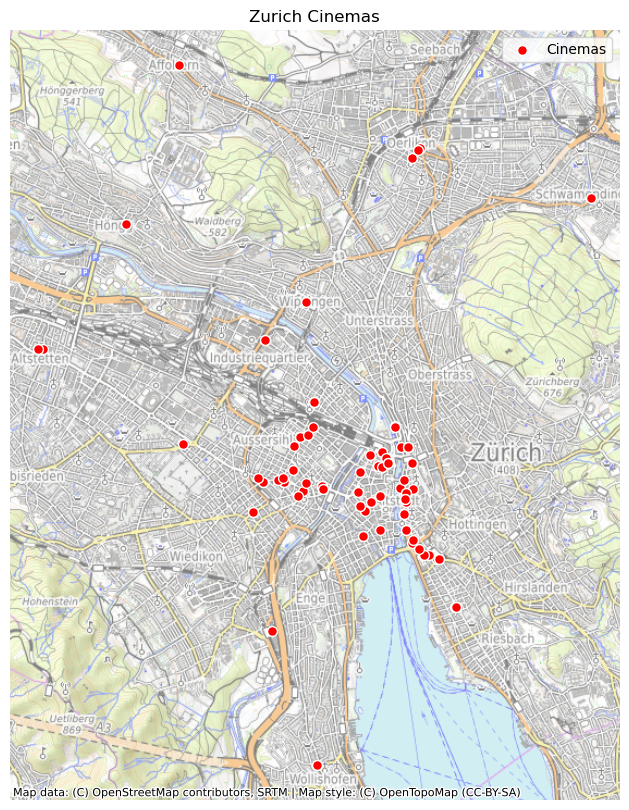

In [143]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from pyproj import Transformer

# 1. read and show file
zurich = gpd.read_file('/Users/michellerausch/Documents/kino.geojson')
#print(zurich.columns)
zurich = zurich.to_crs(epsg=3857)

# 2. create figure and axis
# set axis because map was blue before, even after checking CRS
#ax.set_xlim(zurich.total_bounds[0], zurich.total_bounds[2])
#ax.set_ylim(zurich.total_bounds[1], zurich.total_bounds[3]). this didnt work!!!

ax.set_xlim(x1, x2)
ax.set_ylim(y1, y2)

fig, ax = plt.subplots(figsize=(10, 10))

# 3. plot the data
zurich.plot(ax=ax, 
            legend=True,
            color='red', 
            edgecolor='white', 
            markersize=50, 
            alpha=1, # alpha is the transparency of the dots, useful for overlaps
            label='Cinemas')

# 4. set the bounds
# converting WGS84 bounds to Web Mercator: "from pyproj import Transformer"
# to determine bounds:    print("Data bounds:", zurich.total_bounds)
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857")
x1, y1 = transformer.transform(8.48571285, 47.34389597)  # min bounds
x2, y2 = transformer.transform(8.57313032, 47.41871364)  # max bounds

# 5. add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenTopoMap, zoom=13, alpha=0.5)

plt.title('Zurich Cinemas')
ax.set_axis_off()
plt.legend()
plt.show()

In [30]:
!pip install --upgrade contextily

